# Árvores de decisão
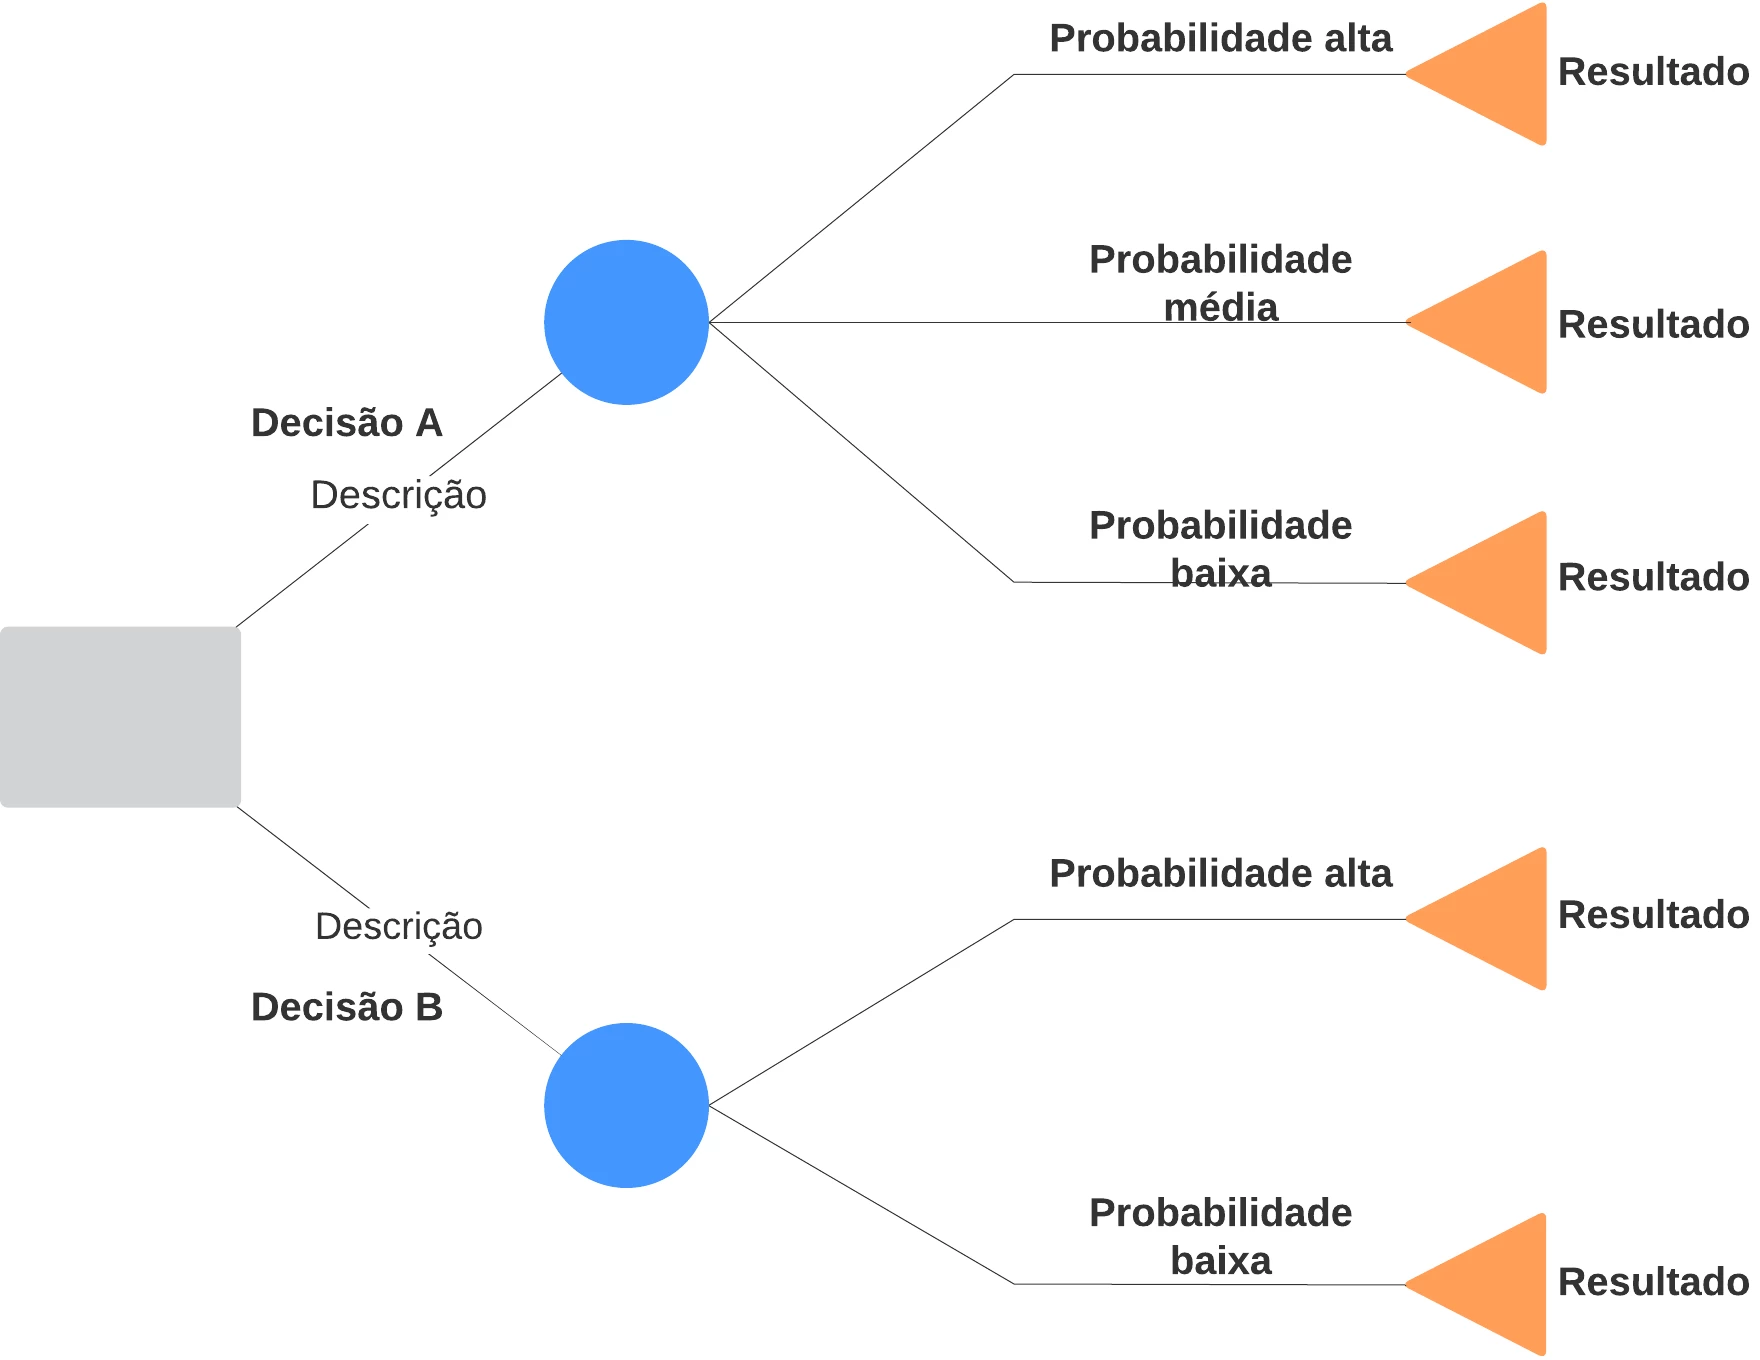
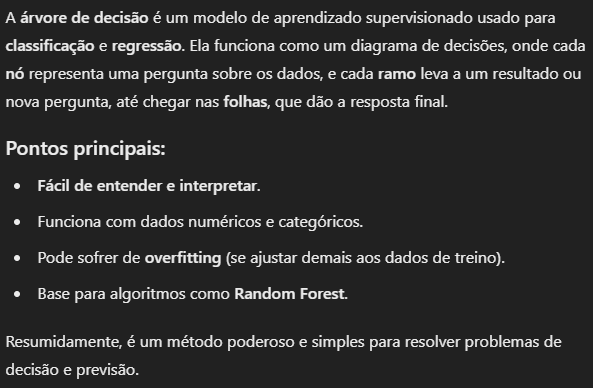

### Tratando dodos

In [8]:
import pandas as pd
dados = pd.read_csv('train.csv')

In [10]:
dados['Age'] = dados['Age'].fillna(dados['Age'].mean())

In [12]:
dados = dados.drop(['Cabin'], axis=1)

In [14]:
dados = dados.dropna()

In [16]:
dados = dados.drop(['PassengerId', 'Name','Ticket'], axis=1)

In [22]:
dummies_sex = pd.get_dummies(dados['Sex'], drop_first=True, dtype='int')

In [24]:
dados = dados.join(dummies_sex)
dados = dados.drop(['Sex'], axis=1)

In [30]:
dummies_embarked = pd.get_dummies(dados['Embarked'], drop_first=True, dtype='int')

In [32]:
dados = dados.join(dummies_embarked)
dados = dados.drop(['Embarked'], axis=1)

## Preparando treinamento

In [36]:
X = dados.drop(['Survived'], axis=1)
y = dados['Survived']

In [38]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

### Trabalhando com árvores de decisão

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sb


#configs
sb.set({'figure.figsize':(15,8)})

In [67]:
model = DecisionTreeClassifier(max_depth=50)
model.fit(X_ent, y_ent)
predicao = model.predict(X_pru)
accuracy_score(y_pru, predicao)

0.797752808988764

In [69]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_ent, y_ent)
predicao = model.predict(X_pru)
accuracy_score(y_pru, predicao)

0.8370786516853933

In [75]:
resultados = []

for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_ent, y_ent)
    predicao = model.predict(X_pru)
    acc = accuracy_score(y_pru, predicao)
    resultados.append(acc)
    print(f'Profundidade {i}, acertou {acc*100:.2f}%')

Profundidade 1, acertou 82.02%
Profundidade 2, acertou 82.02%
Profundidade 3, acertou 84.83%
Profundidade 4, acertou 79.78%
Profundidade 5, acertou 82.02%
Profundidade 6, acertou 85.39%
Profundidade 7, acertou 79.78%
Profundidade 8, acertou 84.27%
Profundidade 9, acertou 84.83%


<Axes: >

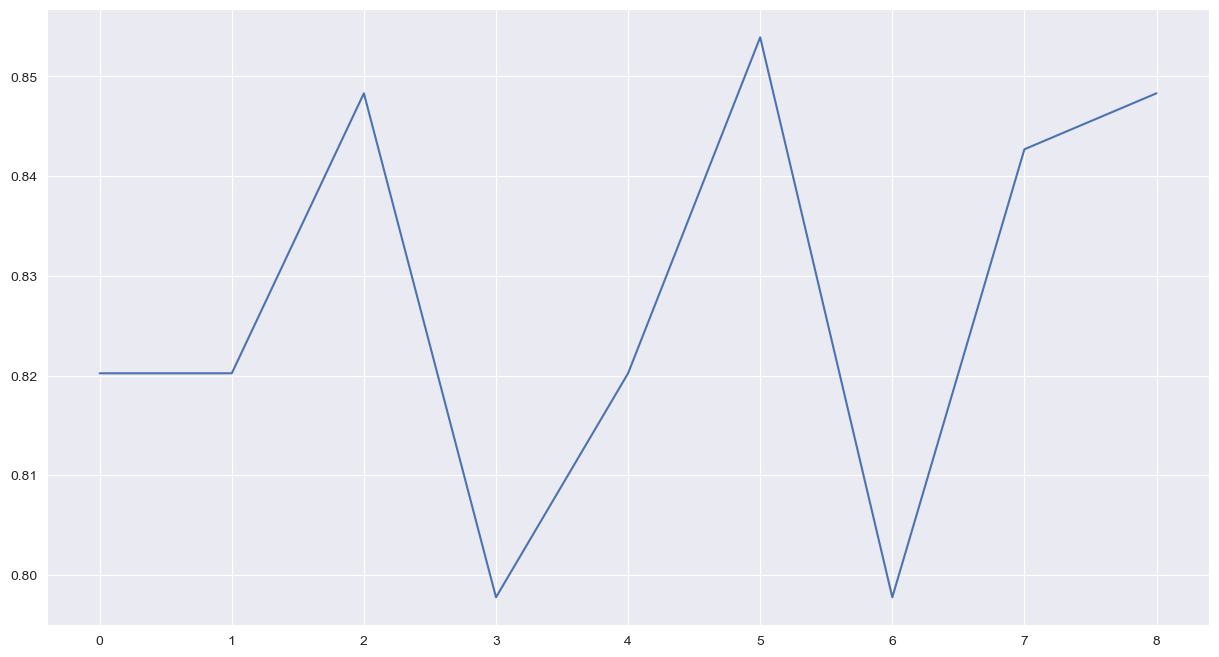

In [89]:
sb.lineplot(data=resultados)

In [93]:
print(classification_report(y_pru, predicao))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.80      0.77      0.78        64

    accuracy                           0.85       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178



In [97]:
matriz_c = confusion_matrix(y_pru, predicao)
pd.DataFrame(matriz_c, columns=['Pred: Não', 'Pred: Sim'], index=['Real: Não', 'Real: Sim'])

,Pred: Não,Pred: Sim
Real: Não,102,12
Real: Sim,15,49


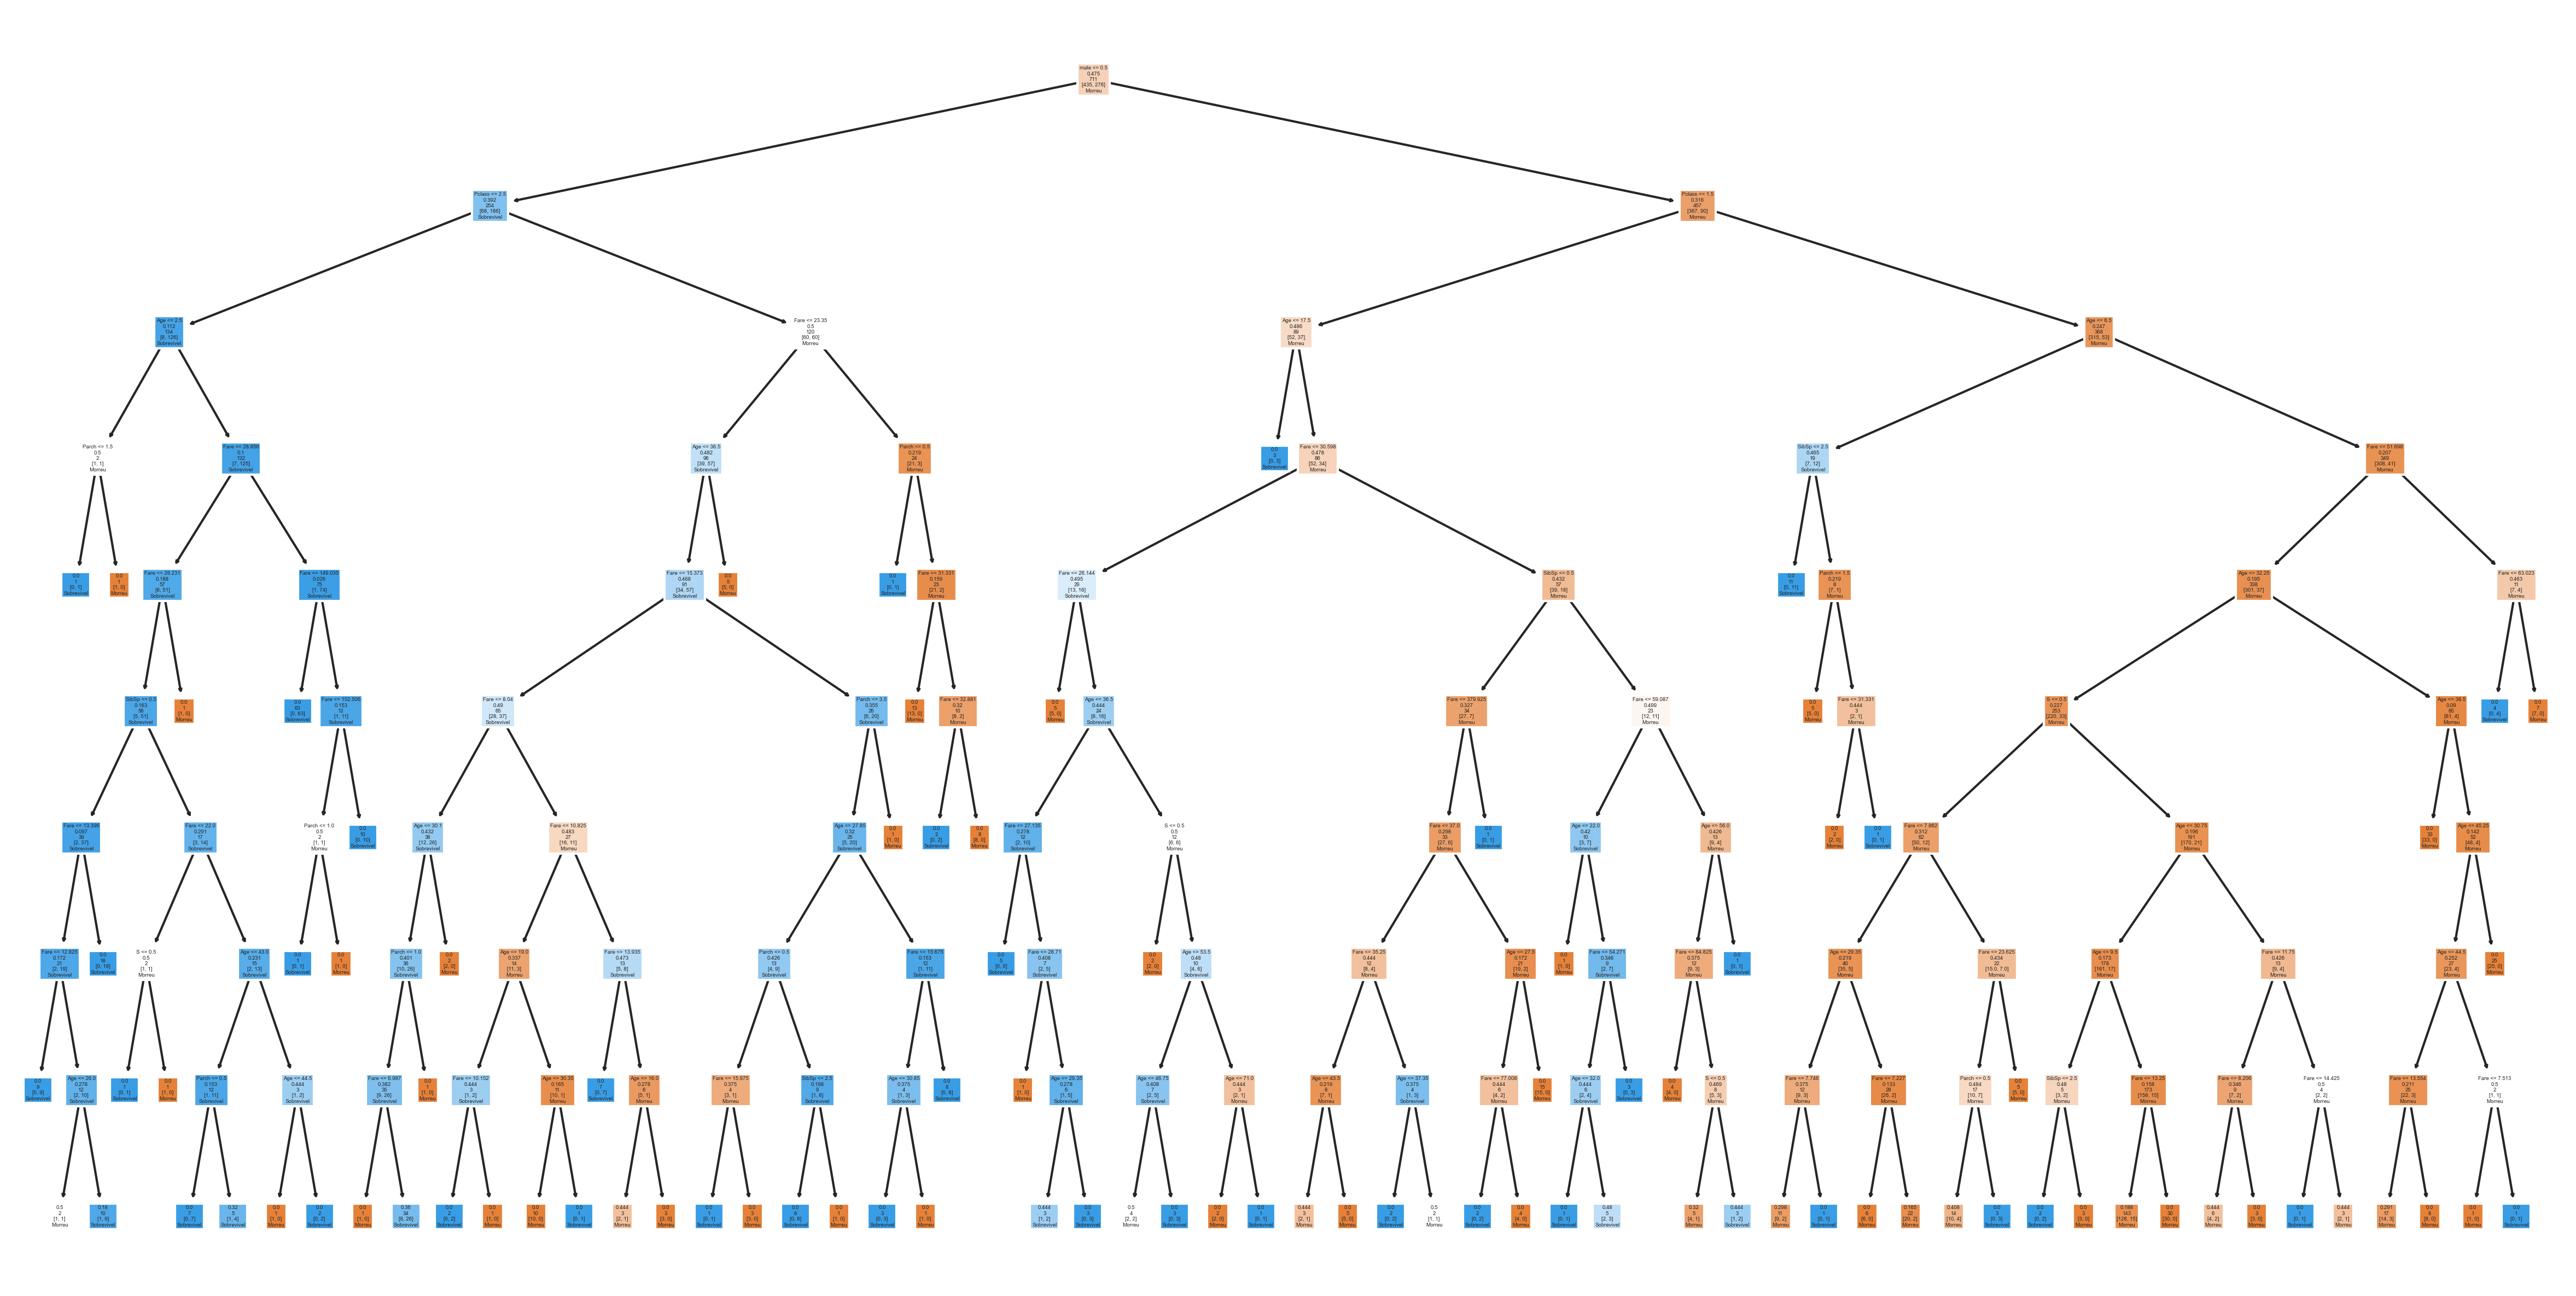

In [117]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10), dpi=300)
plot_tree(
    model,
    feature_names=X_ent.columns,
    class_names=['Morreu','Sobrevivel'],
    filled=True,
    label='none'
)
plt.savefig('tree_titanic_survived.png', dpi=300)